# Day 10 - GARCH Volatility Modeling

## Learning Objectives
- Understand and model volatility clustering in financial returns.
- Apply GARCH (1,1) model to forecast future volatility.
- Interpret model outputs and visualize conditional volatility.

## Key Concepts
- Volatility Clustering: Periods of high/low volatility tend to cluster.
- GARCH(1,1): Generalized Autoregressive Conditional Heteroskedasticity model.
- Conditional Volatility: Time-varying volatility estimated by GARCH.
- Use in Risk Management: Helps forecast risk for VaR, derivatives, etc.

C:\Users\vedik\AppData\Local\Temp\ipykernel_8420\2785433108.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


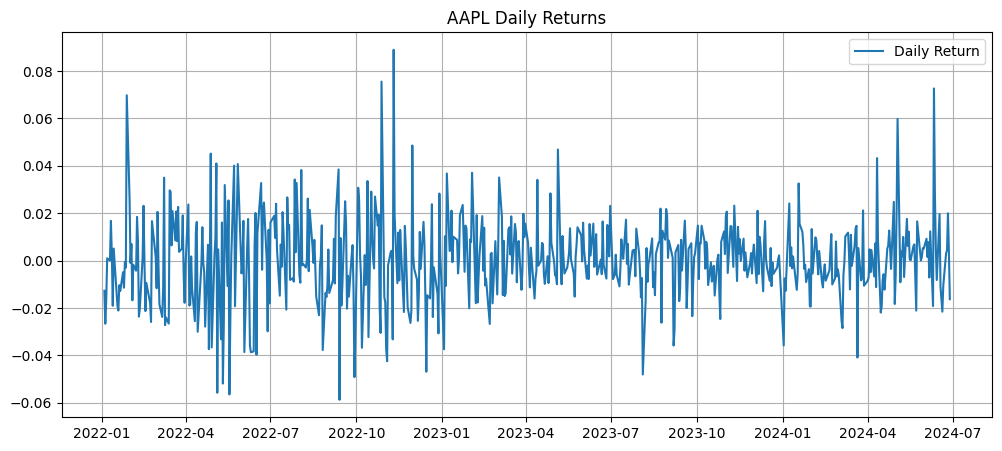

In [9]:
# Step 1: Download stock data and calculate returns
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2024-07-01"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Plot returns
plt.figure(figsize=(12,5))
plt.plot(data['Return'], label='Daily Return')
plt.title(f"{ticker} Daily Returns")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Step 2: Fit GARCH(1,1) Model to Returns
from arch import arch_model

# Fit GARCH(1,1) model
returns = data['Return'] * 100  # Convert to % for better scale
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

# Summary
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1213.28
Distribution:                  Normal   AIC:                           2434.56
Method:            Maximum Likelihood   BIC:                           2452.30
                                        No. Observations:                  624
Date:                Tue, Aug 05 2025   Df Residuals:                      623
Time:                        22:28:36   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0811  6.654e-02      1.218      0.223 [-4.93

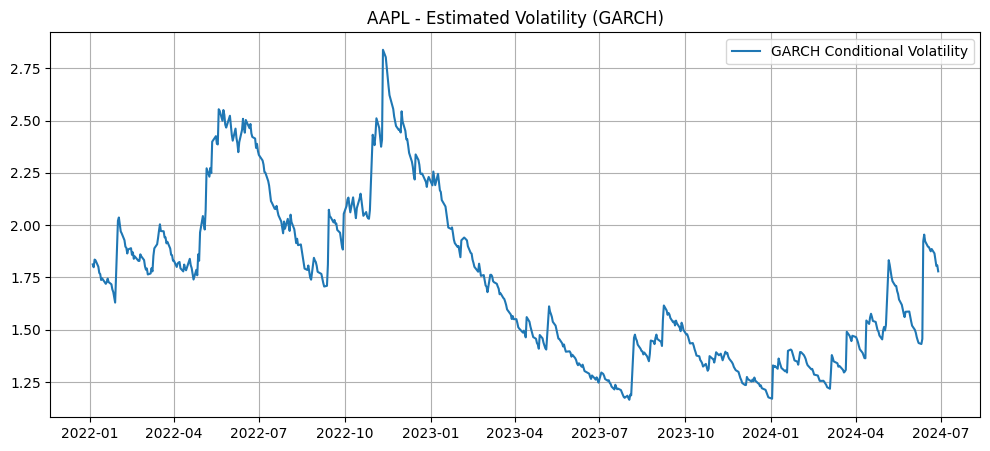

In [11]:
# Step 3: Plot Conditional Volatility
data['CondVol'] = garch_result.conditional_volatility

plt.figure(figsize=(12,5))
plt.plot(data['CondVol'], label='GARCH Conditional Volatility')
plt.title(f"{ticker} - Estimated Volatility (GARCH)")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Step 4: Forecast Future Volatility
forecast = garch_result.forecast(horizon=5)
print("Forecasted Volatility (next 5 days):")
print(forecast.variance[-1:].T)


Forecasted Volatility (next 5 days):
Date  2024-06-28
h.1     3.156130
h.2     3.154438
h.3     3.152762
h.4     3.151104
h.5     3.149462
